# Linear Regression

Forecast the demand of a product for a given week, at a particular store

In [1]:
%matplotlib inline
import sys
from __future__ import print_function
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
rng = np.random

Set the csv file name 

In [2]:
train_filename = "./dataset/train.csv"
test_filename = "./dataset/test.csv"

In [3]:
semanaKey = "Semana"
agenciaIdKey = "Agencia_ID"
canalIdKey = "Canal_ID"
rutaSakKey = "Ruta_SAK"
clienteIdKey = "Cliente_ID"
productIdKey = "Producto_ID"
ventaUniHoyKey = "Venta_uni_hoy"
ventaHoyKey = "Venta_hoy"
devUniProximaKey = "Dev_uni_proxima"
devProximaKey = "Dev_proxima"
demandaUniEquil = "Demanda_uni_equil"
idKey = "id"

In [4]:
train_columns = [semanaKey, agenciaIdKey, canalIdKey, rutaSakKey, clienteIdKey, productIdKey, ventaUniHoyKey, ventaHoyKey, devUniProximaKey, devProximaKey, demandaUniEquil]
test_columns = [idKey, semanaKey, agenciaIdKey, canalIdKey, rutaSakKey, clienteIdKey, productIdKey]

In [5]:
def get_train_data(product_id, client_id):
    df = pd.read_csv(train_filename, names= train_columns, delimiter=',', dtype={semanaKey: object}, skiprows=1)
    dfx = df.apply(pd.to_numeric, errors="ignore")
    train_data = dfx[(dfx.Producto_ID == product_id) & (dfx.Cliente_ID == client_id)]
    return train_data

def get_test_data(product_id, client_id):
    df = pd.read_csv(test_filename, names= test_columns, delimiter=',', dtype={semanaKey: object}, skiprows=1)
    dfx = df.apply(pd.to_numeric, errors="ignore")
    test_data = dfx[(dfx.Producto_ID == product_id) & (dfx.Cliente_ID == client_id)]
    return test_data

In [6]:
def print_division():
    print("")

def log_test_data(test_x, test_y):
    print_division()
    print("test_x")
    print("data = ",test_x)
    print("length = ",len(test_x))
    print("test_y")
    print("data = ",test_y)
    print("length = ",len(test_y))

def log_train_data(train_x, train_y):
    print_division()
    print("train_x")
    print("length = ",len(train_x))
    print("data = ",train_x)
    print("train y")
    print("length = ",len(train_y))
    print("data = ",train_y)

def log_cost_history(cost_history):
    print_division()
    print("Cost History")
    print("range = ",range(len(cost_history)))
    print("data = ",cost_history)

def log_predictions(pred_y):
    print_division()
    print("pred_y")
    print("length = ",len(pred_y))
    print("data = ",pred_y)

In [7]:
productId = 1240
clientId = 15766
print("Searching matches for Producto_ID = ",productId," & Cliente_ID = ",clientId)
train_data = get_train_data(productId, clientId)
test_data = get_test_data(productId, clientId)

Searching matches for Producto_ID =  1240  & Cliente_ID =  15766


In [8]:
train_data_len = len(train_data)
test_data_len = len(test_data)

Parameters

In [9]:
learning_rate = 0.01
training_epochs = 3000
display_step = 50

Training Data

In [10]:
train_X = train_data[semanaKey].values
train_Y = train_data[ventaHoyKey].values
n_samples = train_X.shape[0]
log_train_data(train_X, train_Y)


train_x
length =  5
data =  [3 4 7 8 9]
train y
length =  5
data =  [ 33.52  58.66  67.04  16.76  16.76]


Testing Data

In [11]:
test_X = test_data[semanaKey].values
n_samples_test = test_X.shape[0]
test_Y = np.ones(n_samples_test)
log_test_data(test_X, test_Y)


test_x
data =  [11]
length =  1
test_y
data =  [ 1.]
length =  1


Pure math

In [12]:
mean = np.mean(train_Y)

tf Graph Input

In [13]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

Set model weights

In [14]:
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

Construct a linear model

In [15]:
pred = tf.add(tf.multiply(X, W), b)

Mean squared error

In [16]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

Gradient descent
Note, minimize() knows to modify W and b because Variable objects are trainable=True by default

In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Initializing the variables

In [18]:
init = tf.global_variables_initializer()
cost_history = []

In [19]:
print("Starting Session...")

Starting Session...


Launch the graph

Epoch: 0050 cost= 387.896636963 W= 3.72818 b= 5.15553
Epoch: 0100 cost= 363.122741699 W= 3.24519 b= 8.70485
Epoch: 0150 cost= 341.243713379 W= 2.79091 b= 12.0431
Epoch: 0200 cost= 321.923461914 W= 2.36365 b= 15.1829
Epoch: 0250 cost= 304.864746094 W= 1.96179 b= 18.136
Epoch: 0300 cost= 289.804504395 W= 1.58382 b= 20.9136
Epoch: 0350 cost= 276.510681152 W= 1.22833 b= 23.5259
Epoch: 0400 cost= 264.777526855 W= 0.893973 b= 25.983
Epoch: 0450 cost= 254.423385620 W= 0.579496 b= 28.2939
Epoch: 0500 cost= 245.287750244 W= 0.283719 b= 30.4675
Epoch: 0550 cost= 237.228469849 W= 0.00552613 b= 32.5118
Epoch: 0600 cost= 230.120239258 W= -0.256122 b= 34.4346
Epoch: 0650 cost= 223.851928711 W= -0.502212 b= 36.243
Epoch: 0700 cost= 218.325408936 W= -0.733673 b= 37.9439
Epoch: 0750 cost= 213.454025269 W= -0.951372 b= 39.5437
Epoch: 0800 cost= 209.161209106 W= -1.15613 b= 41.0483
Epoch: 0850 cost= 205.379104614 W= -1.34871 b= 42.4635
Epoch: 0900 cost= 202.048095703 W= -1.52983 b= 43.7945
Epoch: 0950 co

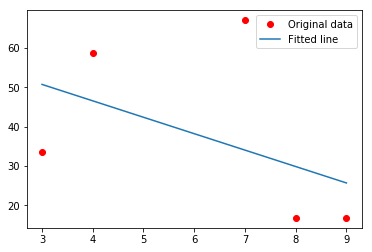

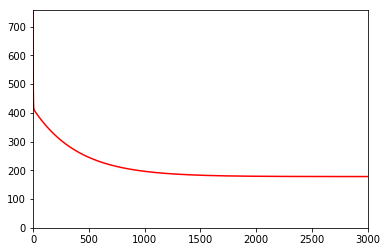

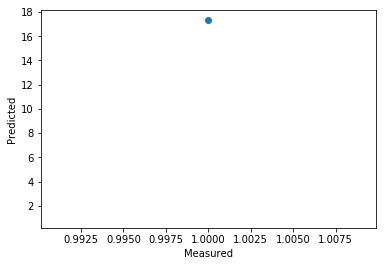

Closing Session...


In [20]:
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        
        c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
        cost_history.append(c)

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    
    # Graphic display

    # Linear regression figure
    f1 = plt.figure() 
    ax1 = f1.add_subplot(111)
    ax1.plot(train_X, train_Y, 'ro', label='Original data')
    ax1.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    ax1.legend()
    
    #Cost history figure
    f2 = plt.figure()
    ax2 = f2.add_subplot(111)
    ax2.plot(range(len(cost_history)),cost_history,color='r')
    ax2.axis([0,training_epochs,0,np.max(cost_history)])
    log_cost_history(cost_history) 

    # Predict data
    print("Predicting data...") 
    test_X = test_data[semanaKey].values
    pred_y = sess.run(pred, feed_dict={X: test_X})
    mse = tf.reduce_mean(tf.square(pred_y - test_Y))
    print("MSE: %.4f" % sess.run(mse)) 
    log_predictions(pred_y)

    '''
    # Testing example
    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))
    '''

    #Prediction figure
    f3 = plt.figure()
    ax3 = f3.add_subplot(111)
    ax3.scatter(test_Y, pred_y)
    ax3.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=3)
    ax3.set_xlabel('Measured')
    ax3.set_ylabel('Predicted')
    plt.show()
    
    print("Closing Session...")
    sess.close()